In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
data_path = r"/Users/AdamHarris/Desktop/OmniglotData/Images"
list = os.listdir(data_path) 
num_samples = np.size(list)
print(num_samples)
list.sort()
print(list)

10000
['00001.png', '00002.png', '00003.png', '00004.png', '00005.png', '00006.png', '00007.png', '00008.png', '00009.png', '00010.png', '00011.png', '00012.png', '00013.png', '00014.png', '00015.png', '00016.png', '00017.png', '00018.png', '00019.png', '00020.png', '00021.png', '00022.png', '00023.png', '00024.png', '00025.png', '00026.png', '00027.png', '00028.png', '00029.png', '00030.png', '00031.png', '00032.png', '00033.png', '00034.png', '00035.png', '00036.png', '00037.png', '00038.png', '00039.png', '00040.png', '00041.png', '00042.png', '00043.png', '00044.png', '00045.png', '00046.png', '00047.png', '00048.png', '00049.png', '00050.png', '00051.png', '00052.png', '00053.png', '00054.png', '00055.png', '00056.png', '00057.png', '00058.png', '00059.png', '00060.png', '00061.png', '00062.png', '00063.png', '00064.png', '00065.png', '00066.png', '00067.png', '00068.png', '00069.png', '00070.png', '00071.png', '00072.png', '00073.png', '00074.png', '00075.png', '00076.png', '0007

In [3]:
labels = np.loadtxt('/Users/AdamHarris/Desktop/OmniglotData/labels.csv', delimiter=',', skiprows=0)
print(labels)
print(len(labels))

[17.  6. 10. ... 14. 19.  1.]
10000


In [4]:
im = Image.open(data_path + '/' + list[0])
np_im = np.array(im)
m, n = np_im.shape[0:2] # get the size of the images
num_images = len(list)
print(m, n, num_images)

500 500 10000


In [5]:
images = np.array([np.array(Image.open(data_path + '/' + fname)) for fname in list])

In [6]:
print(images.shape)

(10000, 500, 500)


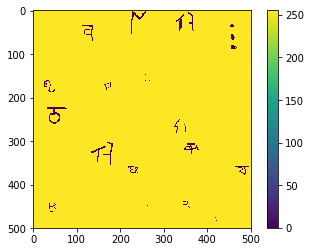

In [7]:
plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
x_test, x_train, y_test, y_train = train_test_split(images, labels, test_size=0.2)

In [9]:
x_test = x_test / 255.0
x_train = x_train / 255.0

In [10]:
class_names = ['Zero Characters', 'One Character', 'Two Characters', 'Three Characters', 'Four Characters', 
               'Five Characters', 'Six Characters', 'Seven Characters', 'Eight Characters', 'Nine Characters',
               'Ten Characters', 'Eleven Characters', 'Twelve Characters', 'Thirteen Characters', 
               'Fourteen Characters', 'Fifteen characters', 'Sixteen Characters', 'Seventeen Characters', 
               'Eighteen Characters', 'Nineteen Characters', 'Twenty Characters', 'Twenty-one Characters',
               'Twenty-two Characters', 'Twenty-three Characters', 'Twenty-four Characters', 'Twenty-five Characters']

In [11]:
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

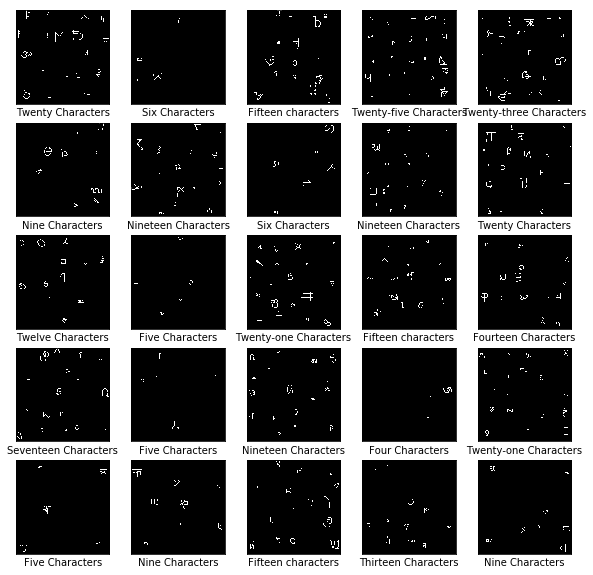

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(m,n)),
    keras.layers.Dense(12500, activation=tf.nn.relu),
    keras.layers.Dense(26, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)